In [1]:
with open("data/ptm/seq.txt") as infile:
    fasta = ""
    for line in infile:
        fasta += line.strip()

In [2]:
from masserstein.peptides import get_protein_formula
from masserstein import Spectrum

from collections import Counter
import random
import itertools
from copy import copy

import gc

from sinkhorn.optimal_transport_py import quick_distance


%matplotlib notebook
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


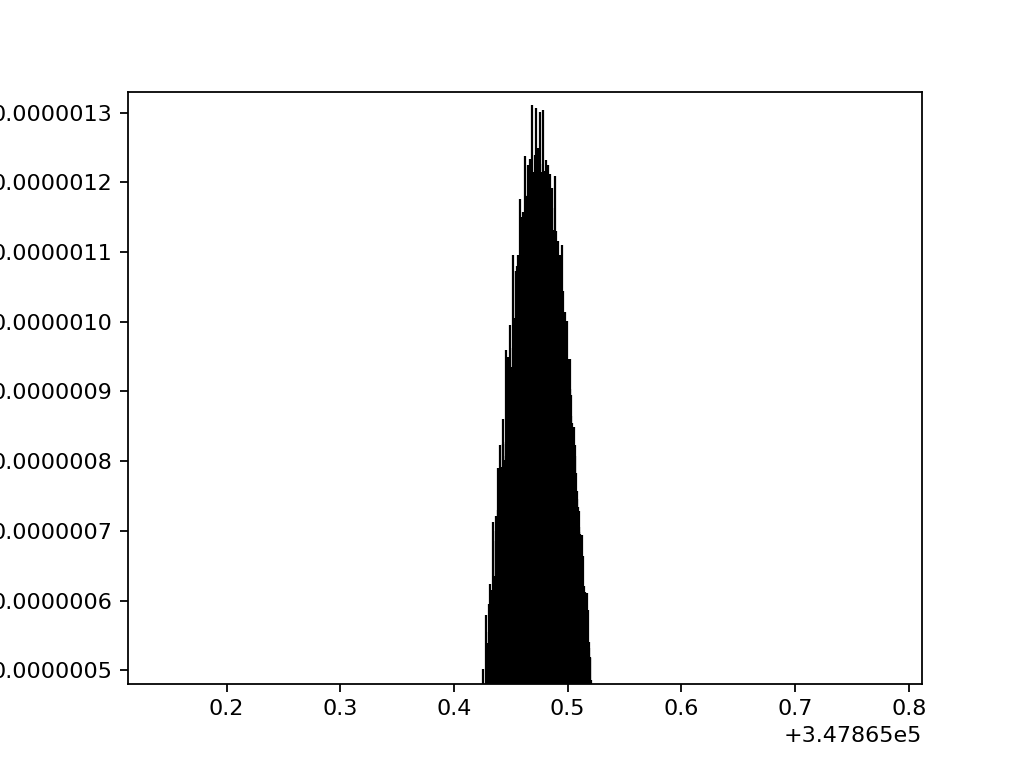

371685

In [3]:
htt_formula = get_protein_formula(fasta)
htt_spectrum = Spectrum(htt_formula, total_prob=0.2)
htt_mass = htt_spectrum.average_mass()

# htt_spectrum.bin_to_nominal() nn 

htt_spectrum.plot()

len(htt_spectrum.confs)


In [8]:
def generate_spectrum(formula, resolution=17000, min_mass=50, max_mass=6000):
    # resolution is mass value / FWHM at 200
    prot_spectrum = Spectrum(formula, total_prob=0.3, charge=1)
    prot_mass = prot_spectrum.average_mass()
    middle_mass = prot_mass / ((min_mass + max_mass) / 2)
    print(middle_mass)
#     htt_mass = htt_spectrum.average_mass()

generate_spectrum(htt_formula)


114.99339408166723


In [5]:
changes = {
    "S": Counter({"H": -1, "P": 1, "O": 3}),
    "K": Counter({"H": 2, "C": 2, "O": 1}),
    "T": Counter({"H": -1, "P": 1, "O": 3})
}

changes_counts = {
    "S": 30,
    "K": 11
}

ids = {
    0: "S",
    1: "K"
}

In [6]:
count = 100



randoms = random.sample(list(itertools.product(*(range(i + 1) for i in changes_counts.values()))), count)


In [16]:
mass_dists = []
spec_dists = []

for i, t in enumerate(randoms):
    print("Doing:", i)
    new_counter = copy(htt_counter)
    for index, coor in enumerate(t):
        change = changes[ids[index]]
#         print(change, new_counter)
        for _ in range(coor):
            new_counter += change
    new_formula = ''.join(sym+str(count) for sym,count in sorted(new_counter.items()))
    new_spectrum = Spectrum(new_formula, threshold=0.3)
    print(len(new_spectrum.confs))
    break
    spec_dists.append(quick_distance(htt_spectrum, new_spectrum))
    print("Here")
    mass_dists.append(new_spectrum.average_mass() - htt_mass)

    gc.collect()
    break

Doing: 0
11531


In [ ]:
import json
with open("data/ptm/results.json", "w") as outfile:
    json.dump([spec_dists, mass_dists])

In [ ]:
import gc
gc.collect()

In [ ]:
import json
?json.dump